In [2]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID as vID
from visualID import color
vID.init(cwd0)

**Début à:** Tuesday 01 November 2022, 09:38:48  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/logoDebut.svg" style="margin-left:auto; margin-right:auto"/></p>

# Traitement statistique de données<br>(data science pour débutants)
## **2.** Statistiques et régression

### **2.1.** Régression linéaire
<div class="rq">
En statistiques, en économétrie et en apprentissage automatique (machine learning), un modèle de régression linéaire est un modèle qui cherche à établir une relation linéaire entre une variable <i>y</i> et une  variable <i>x</i> qui sont toutes deux tirées d'observations. L'incertitude sur ces observations entraîne que le tracé de la variable <i>y</i> en fonction de <i>x</i> s'apparente le plus souvent à un nuage de points, comme sur la figure ci-dessous.

<p style="text-align: center"><img width="600px" src="DS4B-svg/fct1.png" style="margin-left:auto; margin-right:auto" id="img_fct1"/></p>

Dans le cadre d'un modèle linéaire simple, l'optimisation de ce modèle permet de déterminer :
- la droite de régression, qui est la droite qui **passe au plus près de l'ensemble des points** (représentée en rouge sur la figure ci-dessus)
- les paramètres *a* et *b* de la droite d'équation $\hat{y}=ax+b$. *a* est le coefficient directeur (la pente) et *b* est l'ordonnée à l'origine
- l'incertitude sur chacun de ces paramètres
- le coefficient de détermination *R<sup>2</sup>*, qui est une mesure de la qualité de la régression linéaire
</div>
<br>
<div class=warn>
<b>Pourquoi un chapeau sur $\hat{y}$? </b> <br>
Car l'expression $\hat{y}=ax+b$ va permettre de faire une <b>prédiction</b> de la variable $y$ pour n'importe quelle valeur de $x$, pas seulement pour celles qui sont représentées sous forme de nuage de points
</div>

#### 2.1.a. Chargement des modules utiles
On va importer dans notre environnement de travail :
- `pylab`, très utile pour de la programmation scientifique avec python
- `pandas`, qui permet de lire des tableaux au format excel ou csv
- `numpy`, destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux
- `linregress`, qui fait partie de la bibliothèque statistique `scipy`

In [2]:
%matplotlib inline
from pylab import *
import pandas as pd
import numpy as np
from scipy.stats import linregress

<div class=warn>
<b>Attention !</b> <br>
La libraririe SciPy utilise les tableaux et matrices au format NumPy. <br>
Il faudra donc convertir tout tableau au format pandas en tableau au format NumPy
</div>

#### **2.1.b.** Visualisation des données

Dans les lignes de code ci-dessous :
- on charge la base de données iris, qui va être stockée au format pandas dans la variable `dfi`
- on trace la longueur des pétales (`petal_length`) en fonction de leur largeur (`petal_width`)

<div class="warn">
    on a choisi d'assigner la longueur des pétales à $y$ et la largeur à $x$ 
</div>

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

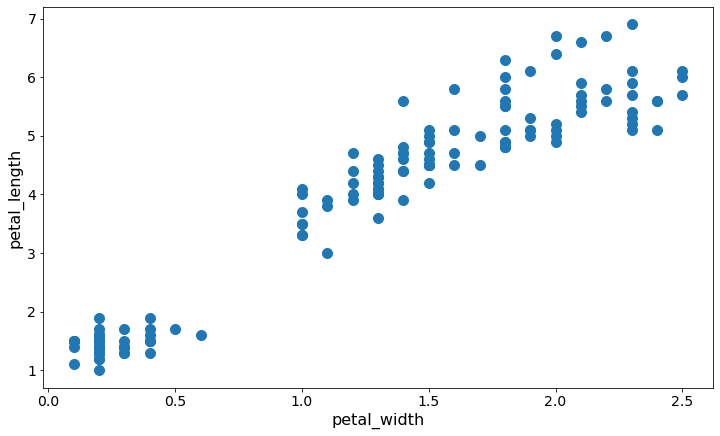

In [3]:
dfi=pd.read_csv('./DS4B-iris-data/iris.csv', sep=";")
plt.rcParams["figure.figsize"] = (12,7) #on ajuste la taille du graphique
plt.rcParams["font.size"] = (16) #on ajuste la taille des caractères
dfi.plot(x="petal_width", y="petal_length", kind='scatter', marker='o',s=100, fontsize=14)

<div class="warn">
    Il semble bien, <i>de visu</i>, qu'il y ait une relation linéaire entre longueur et largeur des pétales
</div>

#### **2.1.c.** Utilisation de la fonction `linregress` (module SciPy)
<div class=warn>
Comme prévu, on commence à convertir les variables au format pandas en variables au format NumPy. <br>
On utilise pour cela la fonction <code>to_numpy()</code>
</div>
<li> la largeur de pétales des 150 échantillons est stockée dans une variable pw (comme petal width)
<li> leur longueur est stockée dans une variable pl (pour petal length)

In [4]:
pw=dfi["petal_width"].to_numpy()
pl=dfi["petal_length"].to_numpy()
print("petal width au format numpy")
display(pw)
print("petal length au format numpy")
display(pl)

petal width au format numpy


array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

petal length au format numpy


array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

<div class="warn">
Ça ressemble bien à un tableau au format NumPy</div>

On peut maintenant appeler la fonction `linregress`.<br>
Elle va renvoyer la pente (`slope`), l'ordonnée à l'origine (`intercept`), l'erreur sur la pente (`stderr`), l'erreur sur l'ordonnée à l'origine (`intercept_stderr`), le coefficient de corrélation (`rvalue`). <br><br>


<div class=warn>

<b>Remarque</b>. Dans le cas de la régression linéaire, le **coefficient de détermination** $R^2$ ("R-carré") est le carré du coefficient de corrélation.

</div>

- on appelle simultanément `linregress` et on sauve le résultat dans une variable `fit`
- puis on va récupérer les paramètres de la droite et du fit
- enfin on affiche les paramètres (ne vous laissez pas impressionner par l'affichage formatté, pour un rendu plus propre)

In [5]:
fit = linregress(x=pw, y=pl)

a = fit.slope
b = fit.intercept
r = fit.rvalue
stderr = fit.stderr
istderr = fit.intercept_stderr

print(f"a   = {a:8.3f}\nb   = {b:8.3f}\nR^2 = {r**2:6.3f}")
print(f"Erreur standard sur la valeur de la pente ={stderr:8.3f}\nErreur standard sur la valeur de l'ordonnée à l'origine ={istderr:8.3f}")

a   =    2.226
b   =    1.091
R^2 =  0.927
Erreur standard sur la valeur de la pente =   0.051
Erreur standard sur la valeur de l'ordonnée à l'origine =   0.073


On n'est pas obligé de formatter la sortie. Voici des instructions `print()` basiques

In [6]:
print("a=",a)
print("b=",b)
print("R2=",r**2)
print("erreur pente=",stderr)
print("erreur OO=",istderr)

a= 2.2258853065539115
b= 1.0905721458773772
R2= 0.9269012279220042
erreur pente= 0.05138190916478042
erreur OO= 0.07294301009148557


<div class=warn>
C'est peu lisible, et on n'a pas besoin d'autant de chiffres significatifs d'où, <i>in fine</i>, l'intérêt de formatter la sortie</div>

#### **2.1.d.** Représentation graphique des résultats
<div class="rq">

On va utiliser la fonction `plot()`. 

On veut à la fois :
- tracer les points $y$ en fonction de $x$
- vérifier que la régression linéaire semble juste, c'est-à-dire que la droite d'équation $\hat{y}=ax+b$ passe bien au plus près de l'ensemble des points 

Dans les lignes de code python ci-dessous :
- on définit la fonction `y_hat` (y chapeau...) qui va renvoyer $ax+b$ pour toute valeur de $x$ ($a$, $b$, $x$ sont passés en paramètre de `y_hat`)
- on appelle `plot` deux fois
    - pour tracer le nuage de points ($x$,$y$)
    - pour tracer la droite `y_hat`
</div>

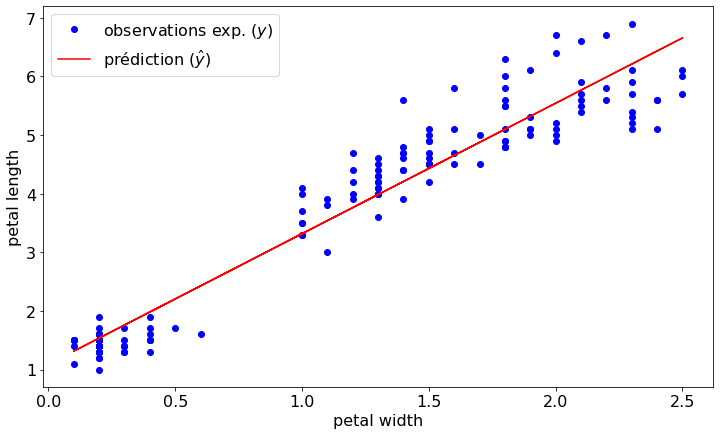

In [7]:
def pl_hat(a,b,x):
    return a * x + b

plot(pw, pl,linestyle='', marker='o', color='blue', label='observations exp. ($y$)')
plot(pw,pl_hat(a,b,pw),color='red',label='prédiction ($\hat{y}$)')
xlabel("petal width") # label de l'axe des abscisses
ylabel("petal length") # label de l'axe des ordonnées
plt.legend() #affichage de la légende sur le graphe

<div class="warn">
    <b>En résumé :</b>
<li> le coefficient de détermination $R^2$ est proche de 1
<li> les erreurs sur l'OO et sur la pente sont faibles
<li> les points expérimentaux ont l'air bien répartis de part et d'autre de la droite
<br><b> Il est donc plutôt convaincant que la largeur et la longueur des pétales soient reliées par une relation linéaire</b>
</div>

#### **2.1.e.** Évaluation de la régression : erreurs moyennes et résidus

<div class="rq">En statistiques, l'erreur moyenne absolue (en anglais <b>MAE</b> = Mean Absolute Error) est calculée à partir de la différence entre les valeurs observées, $y(x_i)$, et les valeurs prédites par un modèle de régression, $\hat{y}(x_i)$. La MAE est la moyenne arithmétique des erreurs calculées pour chacun des points $x_i$ qui a servi à déterminer le modèle de régression.

$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|y(x_{i}-\hat{y}(x_{i})\right|$$

On trouve souvent une autre mesure d'erreur, l'erreur quadratique moyenne (en anglais **MSE** = Mean Squared Error), qui se calcule aussi à partir de $y(x_i)$ et $\hat{y}(x_i)$ :

$$\mathrm{MSE}=\frac{1}{n}\sum_{i}\left[y(x_{i}-\hat{y}(x_{i})\right]^{2}$$

Le module `scikit-learn` fournit deux utilitaires qui permettent de calculer MAE (fonction mean_absolute_error) ou MSE (fonction mean_squared_error).</div>

In [9]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
print(f"MAE = {MAE(pl,pl_hat(a,b,pw)):8.3f}\nMSE ={MSE(pl,pl_hat(a,b,pw)):8.3f}")

MAE =    0.368
MSE =   0.226


<div class="rq">Les <b>résidus</b> sont définis comme étant les différences entre les valeurs observées et les valeurs prédites par un modèle de régression :

$$e(x_i)=y(x_i)-\hat{y}(x_i)$$

Les résidus $e(x_i)$ sont calculés pour chacun des points $x_i$ qui a servi à déterminer le modèle de régression. 

La MAE n'est rien d'autre que la moyenne des résidus :

$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|e(x_{i})\right|$$

L’analyse des résidus a pour objectif de tester la validité d’un modèle de régression. Il s’agit de vérifier graphiquement qu'ils ne présentent aucune structure particulière, c'est-à-dire qu'ils sont distribués irrégulièrement autour de 0. C'est une appréciation “subjective”, mais qui renseigne précisément sur la validité des hypothèses implicites, dont la forme de la fonction choisie. </div>

Dans la portion de code ci-dessous :
- on va d'abord définir une fonctions `residus` ($y(x_i)-\hat{y}(x_i)$)
- puis on va reporter sur un graphe de type nuage de points les résidus calculés pour chaque largeur de pétale (i.e. les $x_i$)
- on va enfin tracer un histogramme, c'est-à-dire la distribution des résidus auour de 0 (0 étant une prédiction parfaite de la fonction $\hat{y}$)
- on va pouvoir ainsi analyser graphiquement la validité de la corrélation linéaire entre largeur et longueur des pétales d'iris

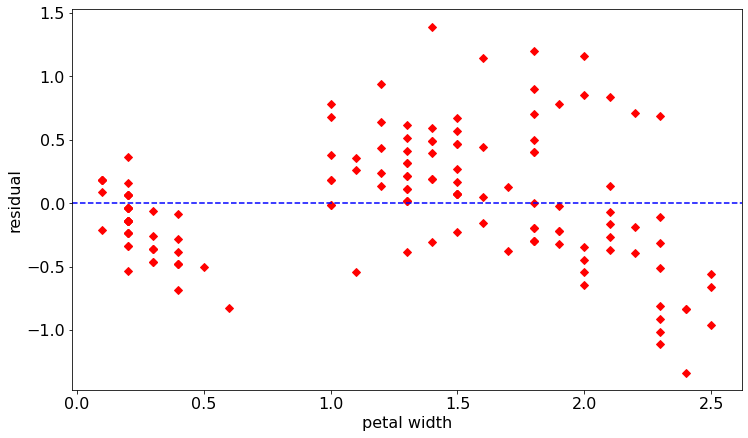

(array([ 1.,  0.,  3.,  0.,  0.,  3.,  3.,  5.,  3.,  5.,  7.,  6.,  5.,
        13., 14., 14., 11., 13.,  9., 11.,  8.,  4.,  3.,  0.,  4.,  2.,
         1.,  1.,  0.,  1.]),
 array([-1.39318842, -1.30232558, -1.21146274, -1.12059989, -1.02973705,
        -0.93887421, -0.84801136, -0.75714852, -0.66628568, -0.57542283,
        -0.48455999, -0.39369715, -0.3028343 , -0.21197146, -0.12110862,
        -0.03024577,  0.06061707,  0.15147992,  0.24234276,  0.3332056 ,
         0.42406845,  0.51493129,  0.60579413,  0.69665698,  0.78751982,
         0.87838266,  0.96924551,  1.06010835,  1.15097119,  1.24183404,
         1.33269688]),
 <BarContainer object of 30 artists>)

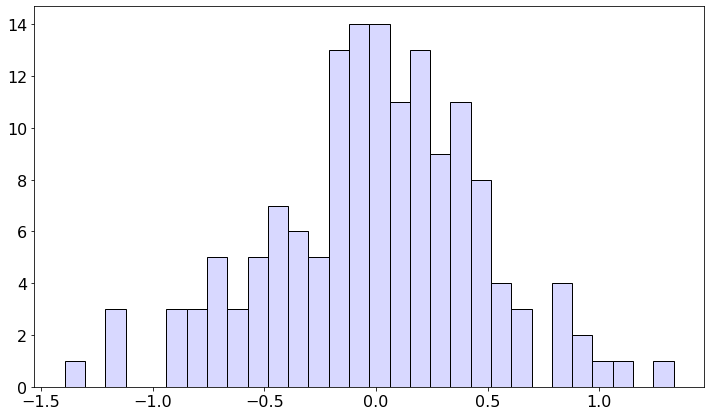

In [11]:
def residus(y,y_hat):
    return y-y_hat

plot(pw,residus(pl,pl_hat(a,b,pw)), linestyle='', marker="D", color='red')
axhline(y = 0, color = 'b',linestyle='--')
xlabel("petal width")
ylabel("residual")
show()

hist(residus(pl_hat(a,b,pw),pl), 30, cumulative=False,label='Training set',color='#d8d8ff', edgecolor='black',align='mid')

<div class="warn">
<li>Le premier graphique semble montrer une distribution aléatoire de la différence entre prédiction et valeur observée
<li>L'histogramme montre une distribution "en cloche" (gaussienne) des résidus, ce qui confirme qu'il semble y avoir une relation linéaire entre largeur et longueur de pétale
</div>

<div class="warn">
<b> La partie ci-dessous est optionnelle.</b>
L'objectif de cette partie est de tracer le nuage de points et l'histogramme à l'aide du module <code>seaborn</code>, qui permet :
<li> de tracer une représentation graphique de meilleure qualité
<li> de tracer l'histogramme des résidus par catégorie d'iris
<li> de tracer les histogrammes en parallèle du nuage de points, c'est-à-dire avec la même échelle des ordonnées
</div>

(-2.0, 2.0)

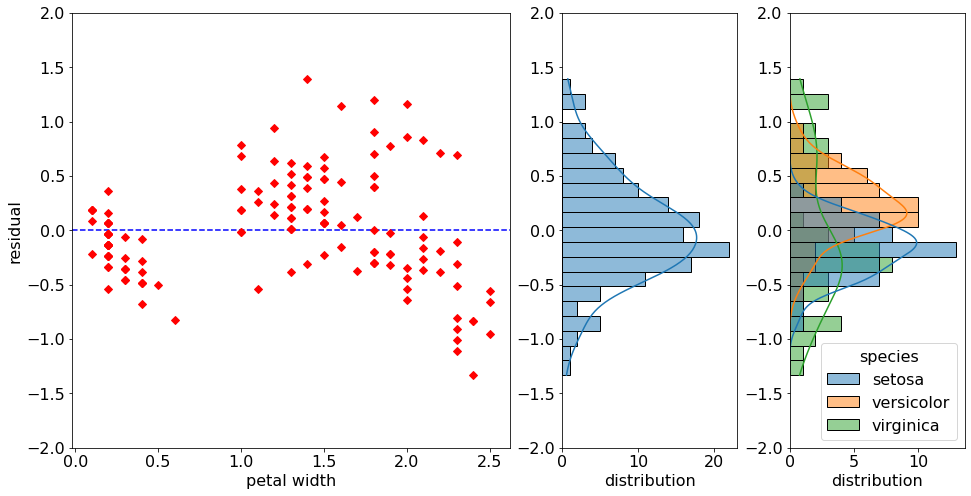

In [12]:
import seaborn as sns
from matplotlib import gridspec
def residus(y_hat,y):
    return y-y_hat
species=dfi["species"]
nbins=20
limit=2
plt.rcParams["figure.figsize"] = (16,8) #on ajuste la taille du graphique
gs = gridspec.GridSpec(1, 3, width_ratios=[2.5, 1, 1])
plt.subplot(gs[0])
axhline(y = 0, color = 'b',linestyle='--')
plt.plot(pw,residus(pl_hat(a,b,pw),pl), linestyle='', marker="D", color='red')
xlabel("petal width")
ylabel("residual")
plt.ylim(-limit,limit)
plt.subplot(gs[1])
xlabel("petal width")
xlabel("distribution")
sns.histplot(y=residus(pl_hat(a,b,pw),pl),bins=nbins,kde=True)
plt.ylim(-limit,limit)
plt.subplot(gs[2])
xlabel("distribution")
sns.histplot(y=residus(pl_hat(a,b,pw),pl),bins=nbins,hue=species,kde=True)
plt.ylim(-limit,limit)

<div class="warn">
    <li>C'est esthétiquement plus stylé
    <li>On visualise mieux la distribution gaussienne de l'erreur globale (premier histogramme)
    <li>On voit sur l'histogramme de droite que la distribution de l'erreur pour l'espèce virginica s'éloigne d'une courbe "en cloche". Par manque de données ?
</div>

#### **2.1.f.** Prédiction de la longueur d'un pétale d'Iris, connaissant sa largeur

<div class="rq"><b>Problème</b>
Un botaniste a découvert au fond de son jardin un Iris de la famille <i>setosa</i>, dont les pétales sont de largeur 0.25 cm.
<ol>
    <li> quelle est la longueur de pétale peut-on prédire, à partir de la base de données "iris"?
    <li> la longueur mesurée est en fait de 1.45 cm. Quelle est l'erreur quadratique commise par le modèle statistique ?
</ol> 
</div>

La fonction `y_hat()`, définie précédemment, va nous permettre de répondre à la première question

In [13]:
largeur_hat=pl_hat(a,b,0.25)
print(largeur_hat)

1.647043472515855


Enfin, et même s'il n'y a qu'une seule valeur, on peut utiliser la fonction `MSE` importée de la librarire `scikit-learn`.
<div class="warn"><b>Attention !</b><br>
La documentation de la fonction `mean_squared_error` (rebaptisée `MSE`) précise que l'appel est de la forme <code>mean_squared_error(y_true, y_pred)</code>, où <code>y_true</code> et <code>y_pred</code> sont des tableaux de valeurs. 

In [14]:
print(MSE([1.45],[largeur_hat]))

0.038826130061106495


### **2.2.** Régression polynomiale avec la fonction polyfit de numpy

#### **2.2.a.** Rappel : allure de fonctions polynomiales simples
On va d'abord tracer les fonctions polynomiales d'ordre 1 à 6, en tant que rappel de cours. Pour mieux organiser la sortie, on va exploiter la fonction `subplot_mosaic` de `matplotlib` (cf Thème "*tracé de fonctions*")

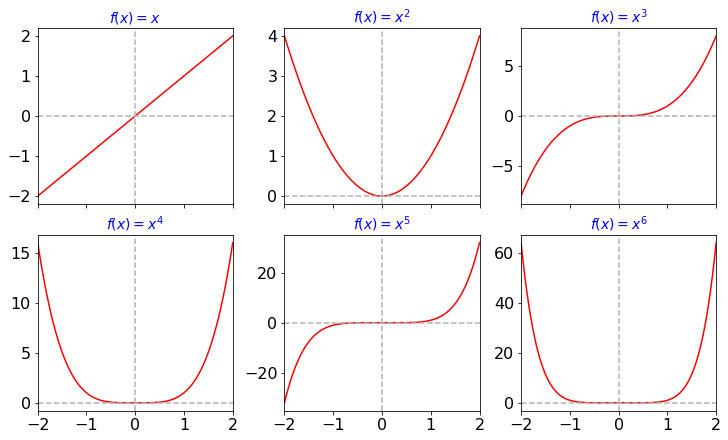

In [30]:
mosaic = [[1,2,3],
         [4,5,6]]
fig, ax = subplot_mosaic(mosaic, constrained_layout=True,figsize=(10,6),sharex=True,sharey=False)

xmin = -2
xmax = 2
npt = 100
# génération de n points équirépartis entre xmin et xmax
x = np.linspace(xmin, xmax, npt)

ax[1].set_xlim(xmin,xmax)
ax[1].plot(x, x,color='red')
ax[1].set_title("$f(x)=x$", fontsize=14, color="blue")
ax[1].axvline(x = 0, color = '0.7',linestyle='--')
ax[1].axhline(y = 0, color = '0.7',linestyle='--')

ax[2].plot(x, x**2,color='red')
ax[2].set_title("$f(x)=x^2$", fontsize=14, color="blue")
ax[2].axvline(x = 0, color = '0.7',linestyle='--')
ax[2].axhline(y = 0, color = '0.7',linestyle='--')

ax[3].plot(x, x**3,color='red')
ax[3].set_title("$f(x)=x^3$", fontsize=14, color="blue")
ax[3].axvline(x = 0, color = '0.7',linestyle='--')
ax[3].axhline(y = 0, color = '0.7',linestyle='--')

ax[4].plot(x, x**4,color='red')
ax[4].set_title("$f(x)=x^4$", fontsize=14, color="blue")
ax[4].axvline(x = 0, color = '0.7',linestyle='--')
ax[4].axhline(y = 0, color = '0.7',linestyle='--')

ax[5].plot(x, x**5,color='red')
ax[5].set_title("$f(x)=x^5$", fontsize=14, color="blue")
ax[5].axvline(x = 0, color = '0.7',linestyle='--')
ax[5].axhline(y = 0, color = '0.7',linestyle='--')

ax[6].plot(x, x**6,color='red')
ax[6].set_title("$f(x)=x^6$", fontsize=14, color="blue")
ax[6].axvline(x = 0, color = '0.7',linestyle='--')
ax[6].axhline(y = 0, color = '0.7',linestyle='--')

#### **2.2.b.** Lecture d'un polynôme & régression

On commence par lire un fichier csv, qui est constitué de 2 colonnes de données (X, puis Y) séparées par une tabulation (`delimiter='\t'`). On trace ensuite Y en fonction de X

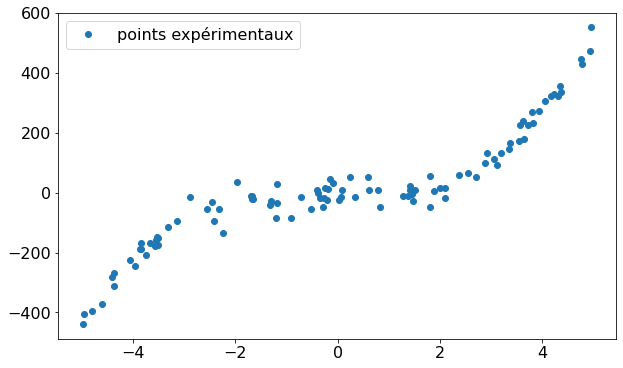

In [18]:
X, Y = np.loadtxt('DS4B-iris-data/fpol.csv', delimiter='\t', unpack=True) #if unpack is True, the returned array is transposed, so that arguments may be unpacked using x, y, z = loadtxt(...)
plt.rcParams["figure.figsize"] = (10,6) #on ajuste la taille du graphique
plt.plot(X, Y,linestyle='', marker='o', label="points expérimentaux")
legend()

<div class="warn">
La fonction ressemble à un polynôme d'ordre impair.
<li>Essayons d'abord un <i>fit</i> des données par un polynôme d'ordre 3, c'est-à-dire du type $ax^3+bx^2+cx+d$<br>
<li>Puis on va afficher les paramètres du polynôme
<li>Enfin, on va tracer les données et le polynôme sur un même graphe 
</div>

[  3.88364929   2.25547523  -0.71153594 -12.44844992]
  3.88x^3 +   2.26x^2 +  -0.71x + -12.45
       3         2
3.884 x + 2.255 x - 0.7115 x - 12.45


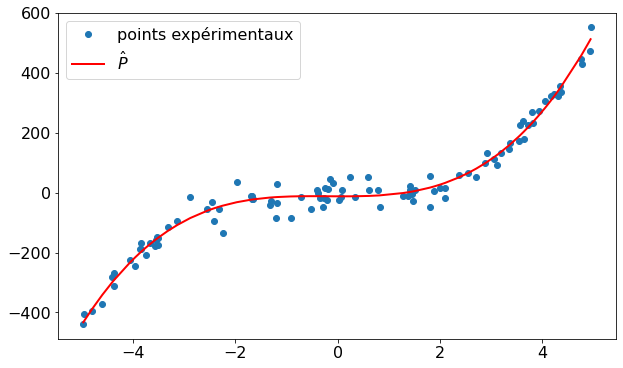

In [19]:
# On appelle la routine polyfit avec les valeurs de X & Y, ainsi que l'ordre du polynôme. Elle va renvoyer les coefficients a, b, c, & d du polynôme, stockés dans la liste PFit3
PFit3 = np.polyfit(X, Y, 3)

#affichage des paramètres du polynôme
print(PFit3)
#affichage formaté
print(f"{PFit3[0]:6.2f}x^3 + {PFit3[1]:6.2f}x^2 + {PFit3[2]:6.2f}x + {PFit3[3]:6.2f}")

#inutile de faire des copier/coller des valeurs de a, b, c, d. On va utiliser directement poly1d, en lui passant PFit3 en paramètre
# poly1d fait partie de NumPy. Par exemple, poly1d (3, 2, 6) renvoie 3x^2 + 2x + 6.
P_hat3  = np.poly1d(PFit3)
print(P_hat3)

# tracé des points
plt.plot(X, Y,linestyle='', marker='o', label="points expérimentaux")
plt.plot(X, P_hat3(X),'-', marker='', color='r', linewidth=2, label="$\hat{P}$")
legend()

On constate une très bonne superposition. On va maintenant calculer les erreurs moyennes (MAE et MSE)  

In [20]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
print(f"MSE = {MSE(Y,P_hat3(X)):8.3f}\nMAE ={MAE(Y,P_hat3(X)):8.3f}")

MSE =  859.155
MAE =  22.161


Se pourrait-il qu'un polynôme d'ordre 5 permette un meilleur fit ? On va mettre en &oelig;uvre toute la procédure en finissant par le calcul des erreurs

           5            4         3         2
-0.008175 x + 0.004643 x + 4.117 x + 2.158 x - 2.047 x - 12.23
MSE =  857.950
MAE =  22.165


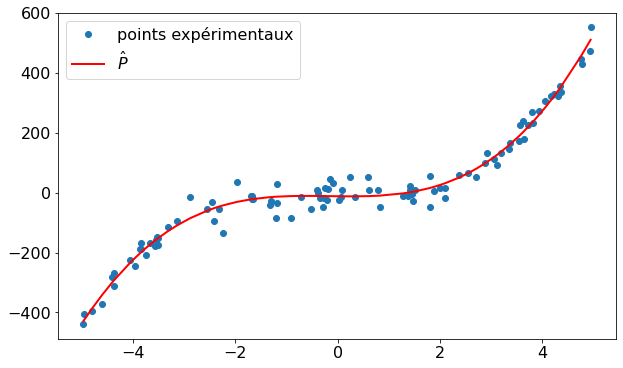

In [21]:
PFit5 = np.polyfit(X, Y, 5)
P_hat5  = np.poly1d(PFit5)
print(P_hat5)
plt.plot(X, Y,linestyle='', marker='o', label="points expérimentaux")
plt.plot(X, P_hat5(X),'-', marker='', color='r', linewidth=2, label="$\hat{P}$")
legend()
print(f"MSE = {MSE(Y,P_hat5(X)):8.3f}\nMAE ={MAE(Y,P_hat5(X)):8.3f}")

<div class="warn">
    Compte tenu des faibles coefficients associés aux ordres élevés ($x^5$ et $x^4$) il s'agit bien d'une fonction polynomiale d'ordre 3. La légère diminution de la MAE et de la MSE montre que l'introduction des ordres 4 et 5 permet de diminuer légèrement l'écart entre fonction prédite et fonction réelle.<span style="color:red;"><b> Mais ça n'est pas forcément une bonne chose (</b>cf paragraphe "surapprentissage").</span><br> <br>
    En fait, la fonction tracée a été générée en "bruitant" le polynôme $4x^3+2x^2-3x-6$.<br>
    La comparaison avec les coefficients polynomiaux issues du fit montre qu'il vaut donc mieux chercher à fitter les données avec l'ordre polynomial le plus approprié, même si en apparrence on réduit l'erreur.
</div>

In [22]:
print(f"{color.BOLD}{color.RED}Pour mémoire :{color.OFF}")
print("Polynôme d'ordre 3 :")
print(P_hat3)
print(f"Polynôme d'ordre 5 :")
print(P_hat5)

Pour mémoire :
Polynôme d'ordre 3 :
       3         2
3.884 x + 2.255 x - 0.7115 x - 12.45
Polynôme d'ordre 5 :
           5            4         3         2
-0.008175 x + 0.004643 x + 4.117 x + 2.158 x - 2.047 x - 12.23


<div class="warn">
    <b> Pourquoi ne retrouve-t-on pas exactement l'équation $4x^3+2x^2-3x-6$ ?</b><br>
        À cause du bruit introduit dans la fonction.<br><br>
    <b>Remarque. </b>On a introduit un bruit = 30. Un commentaire ? (<i>Suggestion: regarder la MAE...</i>)
</div>

#### **2.2.c.** Surapprentissage (ou overfitting)
On va reprendre le même jeu de données, mais on va essayer de réduire l'erreur, en considérant un ordre très élevé

           31             30             29             28
3.528e-13 x  - 1.195e-12 x  - 6.518e-11 x  + 2.075e-10 x 
              27             26            25             24
 + 5.361e-09 x  - 1.593e-08 x  - 2.58e-07 x  + 7.079e-07 x 
              23             22             21             20
 + 8.031e-06 x  - 1.999e-05 x  - 0.0001681 x  + 0.0003678 x 
             19           18           17          16          15
 + 0.002373 x  - 0.00425 x  - 0.02164 x  + 0.0252 x  + 0.1082 x 
            14           13         12         11         10         9
 + 0.03618 x  - 0.02556 x  - 1.941 x  - 3.428 x  + 15.71 x  + 22.56 x
          8         7         6         5      4         3         2
 - 61.96 x - 69.52 x + 118.4 x + 114.8 x - 73 x - 106.5 x - 37.31 x + 58.56 x + 8.867
MSE =  570.727
MAE =  17.983


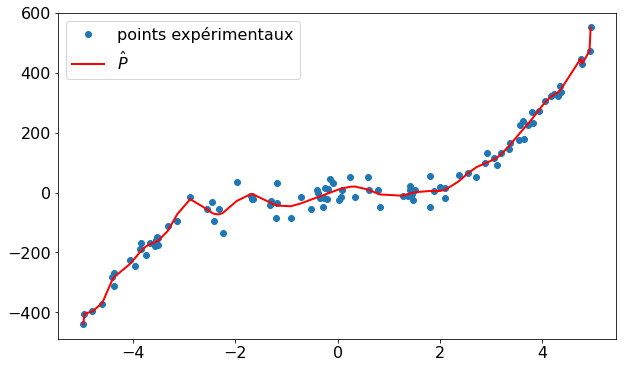

In [23]:
PFit31 = np.polyfit(X, Y, 31)
P_hat31  = np.poly1d(PFit31)
print(P_hat31)
plt.plot(X, Y,linestyle='', marker='o', label="points expérimentaux")
plt.plot(X, P_hat31(X),'-', marker='', color='r', linewidth=2, label="$\hat{P}$")
legend()
print(f"MSE = {MSE(Y,P_hat31(X)):8.3f}\nMAE ={MAE(Y,P_hat31(X)):8.3f}")


<div class="warn">
    L'écart entre points expérimentaux et fonction polynomiale a beaucoup diminué (cf MAE & MSE). L'augmentation de l'ordre permet de passer au plus près d'un grand nombre de points. <br>
    Lorsqu'on examine les valeurs des coefficients on s'aperçoit qu'on s'éloigne beaucoup de la loi réelle qui relie $x$ et ces données ($4x^3+2x^2-3x-6$). Les coefficient associés à $x^3$, $x^2$ et $x$ sont même totalement farfelus !<br>
    Dans le contexte de la <b>science des données et de l'apprentissage automatique</b>, on parlerait de <span style="color:red"><b>surapprentissage</b></span> (overfitting) : le modèle polynomial sait reproduire beaucoup de détails, mais <b>il est passé à côté du phénomène global</b>, décrit ici par l'équation $4x^3+2x^2-3x-6$.
</div>

### **2.3.** Régression avec le module SciPy

La fonction `curve_fit` du module `scipy` présente l'intérêt de pouvoir établir des corrélations plus complexes que des fonctions affines ou polynomiales.

L'utilisation de `curve_fit` nécessite deux étapes :

- définir la relation à modéliser sous forme d'une fonction python `f(x,a,b,c...)` qui prend comme arguments la valeur en abscisse `x`, puis les coefficients du modèle à déterminer `a,b,c...`

- utiliser la fonction `curve_fit` avec comme arguments la fonction python, la série en abscisse et la série en ordonnée

#### 2.3.a. Appel des moduless

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

#### **2.3.b.** Mise en &oelig;uvre du fit

In [26]:
def P3(x,a,b,c,d):
    P =  a*x**3 + b*x**2 + c*x + d
    return P

X, Y = np.loadtxt('DS4B-iris-data/fpol.csv', delimiter='\t', unpack=True) #if unpack is True, the returned array is transposed, so that arguments may be unpacked using x, y, z = loadtxt(...)

PFit3b, _ = curve_fit(P3, X, Y)
P_hat3b  = np.poly1d(PFit3b)
#affichage des paramètres du polynôme
print(P_hat3b)
print()
print(f"{color.BLUE}{color.BOLD}à comparer au résultat du fit avec polyfit :{color.OFF}")
print(P_hat3)

       3         2
3.884 x + 2.255 x - 0.7115 x - 12.45

à comparer au résultat du fit avec polyfit :
       3         2
3.884 x + 2.255 x - 0.7115 x - 12.45


<div class="warn">
    On a utilisé deux moduless différentes (<code>NumPy</code> et <code>SciPy</code>), qui heureusement donnent le même résultat.<br>
    <li> <code>polyfit</code> est plus facile à utiliser pour une régression polynomiale
    <li> <code>curve_fit</code> est beaucoup plus général, puisqu'on peut fitter n'importe quelle fonction mathématique, pas uniquement des polynômes
</div>

### **2.4.** Bilan de la deuxième partie

- on a pu déterminer l'équation d'une fonction mathématique qui reflète le lien entre deux ensembles de variables $(x, y)$, qui sont toutes deux tirées d'observations

- en d'autres termes, on a recherché la fonction mathématique permettant d'expliquer le comportement de la variable statistique $y$ en fonction d'une autre variable statistique $x$

- même s'il existe des grandeurs qui permettent d'avoir un aperçu global de la qualité de l'ajustement (MAE, MSE, $R^2$), c'est insuffisant : il faut exercer un regard critique par le tracé des résidus

- dans le cas où le "*fitting*" semble convaincant, cette fonction mathématique, $\hat{y}=f(x)$, va permettre de prédire $y$ pour une valeur de $x$ quelconque. **Attention !** Il est dans la plupart des cas dangereux d'extrapoler en dehors de l'intervalle de la variable $x$ mesurée (observée).

### **2.5.** Chapitre suivant : l'apprentissage supervisé (supervised Machine Learning) appliqué à la classification (régression logistique)

<div class="rq">
    
On attire aussi l'attention sur un point important : on s'est servi de **toutes** les observations $(x_i,y_i)$ pour déterminer l'équation de la fonction mathématique $\hat{y}$. Pourquoi appuyer sur ce point ? Car avec les algorithmes d'apprentissage automatique (machine learning) on ne se sert que d'une partie des données pour l'apprentissage, le reste étant utilisé pour tester la fiabilité de l'algorithme. On va voir ça dans le [chapitre suivant](./DS4B-Iris3.ipynb).


N'oubliez pas de faire d'abord [l'exercice associé à ce chapitre](./DS4B-Exercices/DS4B-Iris2-Exercice.ipynb).

</div>

### Évaluation formative après la vidéo

Voir les quizz (uniquement pour les étudiants d'UT3, cf Moodle)

In [3]:
vID.end(cwd0)

**Fin à:** Tuesday 01 November 2022, 09:38:53  
**Durée:** 00:00:06 984ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoFin.svg" style="margin-left:auto; margin-right:auto"/></p>